# TEXT CLASSIFICATION

# Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Dataset_A.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 28 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   SCENARIO_CODE                                                             1177 non-null   object 
 1   FEATURE_URL                                                               1177 non-null   object 
 2   FEATURE FILE                                                              1177 non-null   object 
 3   SCENARIO_TITLE                                                            1176 non-null   object 
 4   SCENARIO                                                                  1177 non-null   object 
 5   POINTS                                                                    1177 non-null   float64
 6   Capitalize Gherkin keywords                                     

## Taking care of missing data

In [3]:
dataset.dropna(subset = ["POINTS"], inplace=True)
# dataset.info()
dataset.head(2)

,SCENARIO_CODE,FEATURE_URL,FEATURE FILE,SCENARIO_TITLE,SCENARIO,POINTS,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,Number of syllables per word,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
0,P01_F01_SC_01,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Authentication required,Scenario: Authentication required\n Given...,4.77,5,5,3,3,...,5,5,5,5,5,5,5,5,5,5
1,P01_F01_SC_02,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Register as new user,Scenario titles,4.82,5,5,3,3,...,5,5,5,5,5,5,5,5,5,5


### Scalling the points to 0 - 100 range f(x) = (( x - min )/( max - min ))*100

In [4]:
min=dataset[dataset.POINTS == dataset.POINTS.min()].POINTS.values[0]
max=dataset[dataset.POINTS == dataset.POINTS.max()].POINTS.values[0]

SCALLED_POINTS=((dataset.POINTS-min)/(max-min))*100

if 'SCALLED_POINTS' in dataset.columns:
    dataset.drop('SCALLED_POINTS',axis='columns', inplace=True)
dataset.insert(6,'SCALLED_POINTS',SCALLED_POINTS)
dataset.head(2)

,SCENARIO_CODE,FEATURE_URL,FEATURE FILE,SCENARIO_TITLE,SCENARIO,POINTS,SCALLED_POINTS,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
0,P01_F01_SC_01,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Authentication required,Scenario: Authentication required\n Given...,4.77,74.725275,5,5,3,...,5,5,5,5,5,5,5,5,5,5
1,P01_F01_SC_02,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Register as new user,Scenario titles,4.82,80.219780,5,5,3,...,5,5,5,5,5,5,5,5,5,5


### Labelling

In [5]:
dataset.POINTS=dataset.SCALLED_POINTS
readable_cut=60
Target=dataset['POINTS'].where(dataset['POINTS']<=readable_cut,'Readable').where(
    dataset['POINTS'] > readable_cut,'Less readable')

if 'TARGET' in dataset.columns:
    dataset.drop('TARGET',axis='columns', inplace=True)
dataset.insert(6,'TARGET',Target)
dataset.groupby('TARGET').count()['SCENARIO']

TARGET
Less readable    392
Readable         785
Name: SCENARIO, dtype: int64

### Removing other fields

In [6]:
dataset=dataset[['SCENARIO','TARGET']]

dataset.to_csv('DATASET_A_CLEAN.csv', index=False)
dataset.head()

,SCENARIO,TARGET
0,Scenario: Authentication required\n Given...,Readable
1,Scenario titles,Readable
2,Scenario: Verify email\n Given I register...,Readable
3,Scenario: Sign in\n Given I am a register...,Readable
4,Scenario: Sign out\n Given I am signed in...,Readable


### Asigning X and y Values

In [7]:
X = dataset.SCENARIO.values
y = dataset.TARGET.values

### Encoding the Dependent Variable -y values

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
# dataset.TARGET.value_counts().plot(kind='bar');

[1 1 1 ... 1 1 1]


## Encoding Independent Variable -X values

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)
print(X_counts.data)
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_counts)
X_tf = tf_transformer.transform(X_counts)
X_tf.data

[1 1 1 ... 1 1 2]


array([0.20412415, 0.20412415, 0.20412415, ..., 0.11111111, 0.11111111,
       0.22222222])

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size = 0.2, random_state = 2)
print('X_train.size',X_train.size)
print('X_test.size',X_test.size)

X_train.size 38920
X_test.size 9939


## K-NN model

0.8771186440677966
Maximum accuracy:- 0.8771186440677966 at K = 3


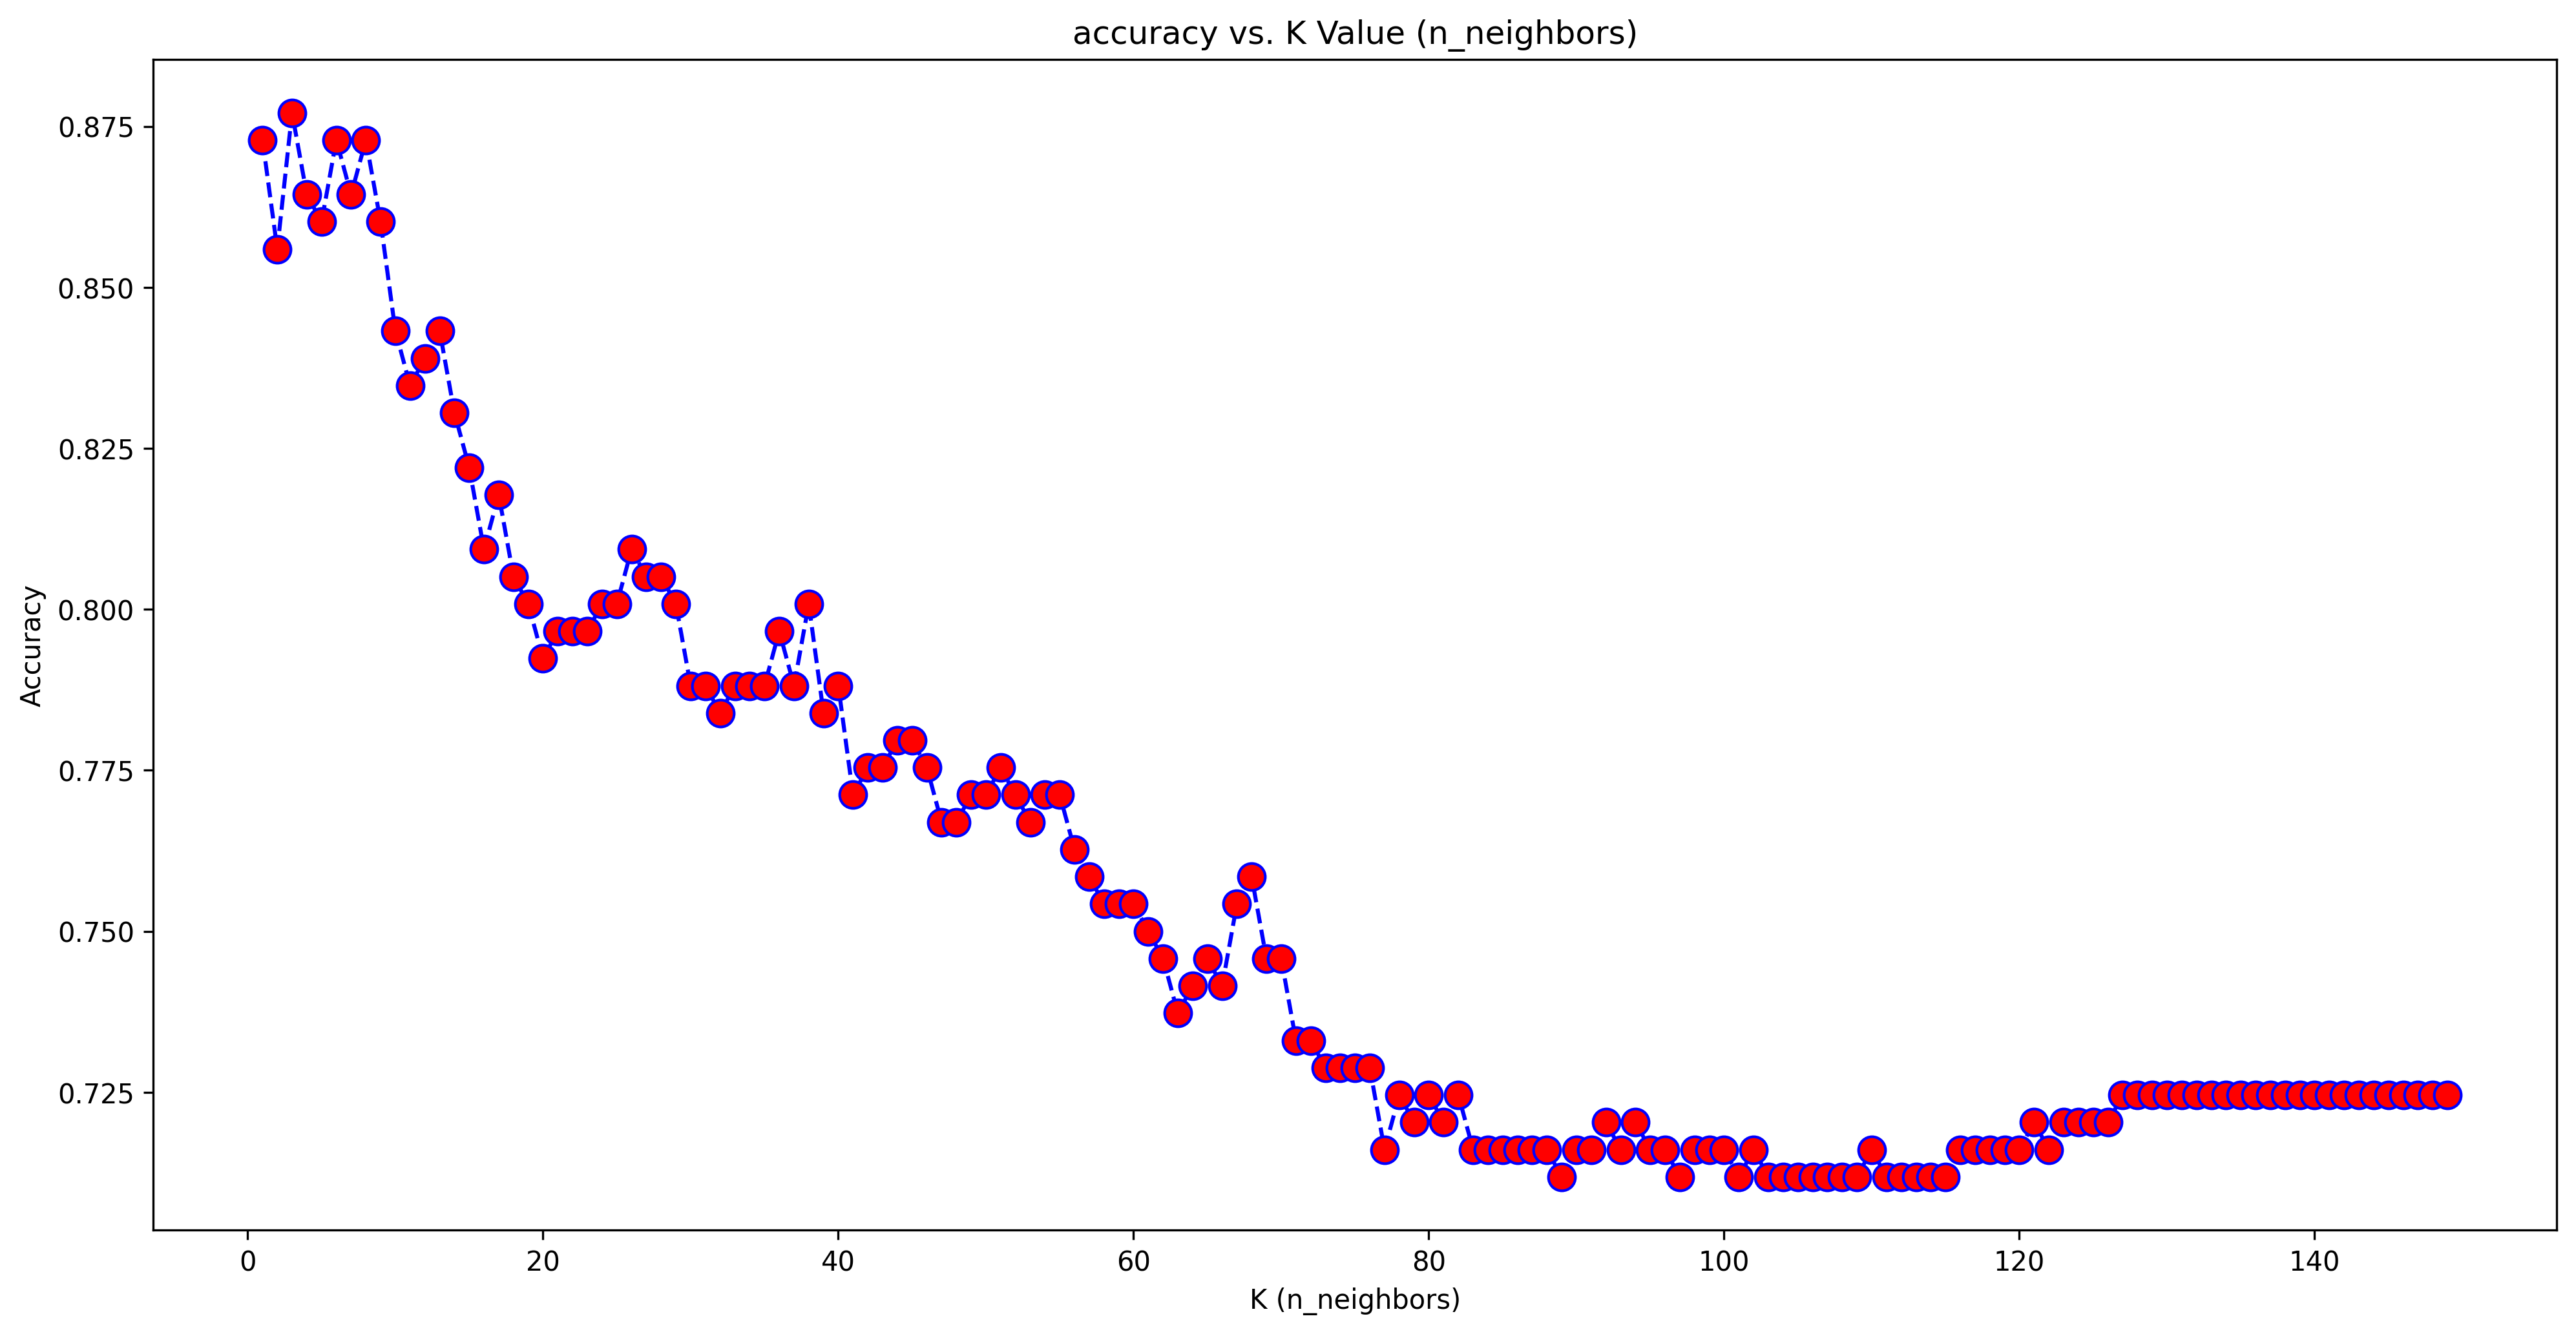

In [11]:

import numpy as np

acc = []
# Will take some time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,150):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
# plt.figure(figsize=(10,6))
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(range(1,150),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value (n_neighbors)')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy')
arr = pd.DataFrame(data=acc, columns={"acc"})
max=arr['acc'].max()
k =acc.index(max)+1
print(max)
print("Maximum accuracy:-",max,"at K =",k)

In [12]:
## Training the K-NN Classification model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

## Predicting the Test Xs using K-NN trained classifier
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_test, y_pred))

## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
k_nn=precision_recall_fscore_support(y_test, y_pred, average='weighted')
k_nn

[[ 68  17]
 [ 12 139]]
accuracy 0.8771186440677966


(0.8762494567579313, 0.8771186440677966, 0.8762574678491424, None)

## Kernel SVM model

In [13]:
## Training the Kernel SVM Classification model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

## Predicting the Test Xs using Kernel SVM trained classifier
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_test, y_pred))

## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
k_svm=precision_recall_fscore_support(y_test, y_pred, average='weighted')
k_svm

[[ 54  31]
 [  6 145]]
accuracy 0.8432203389830508


(0.8512856317411402, 0.8432203389830508, 0.8356979572723358, None)

## Naive Bayes model

In [14]:
## Training the Naive Bayes Classification model on the Training set
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(X_train.toarray(), y_train)

## Predicting the Test Xs using Naive Bayes trained classifier
y_pred = classifier.predict(X_test.toarray())

from sklearn.metrics import classification_report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['Less readable','Readable']))

## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
nb=precision_recall_fscore_support(y_test, y_pred, average='weighted')
nb

accuracy 0.8050847457627118
               precision    recall  f1-score   support

Less readable       0.70      0.81      0.75        85
     Readable       0.88      0.80      0.84       151

     accuracy                           0.81       236
    macro avg       0.79      0.81      0.80       236
 weighted avg       0.82      0.81      0.81       236



(0.8161329989240419, 0.8050847457627118, 0.8077624764595104, None)

## Random Forest Classification model

best n_estimators is 16 with best acc 0.8898305084745762


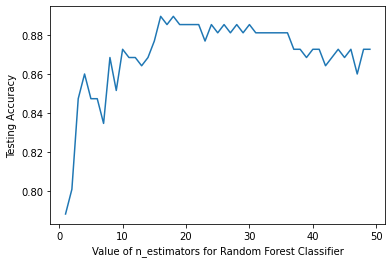

In [15]:
##Finding the best n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
best_acc=0
best_n=1
for k in range(1, 50):
    rfc = RandomForestClassifier(n_estimators=k, criterion = 'entropy', random_state = 1)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    scores.append(acc)
#     if currentScore<scores[k-1]:
#         currentScore=scores[k-1]
#         goodK=k
    
    if best_acc<acc:
        best_acc=acc
        best_n=k

# print(best_n, best_acc)
print("best n_estimators is {} with best acc {}".format(best_n, best_acc))


# plot the relationship between K and testing accuracy
plt.plot(range(1, 50), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.show()


In [16]:
## Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = best_n, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)

## Predicting the Test Xs using Random Forest trained classifier
y_pred = classifier.predict(X_test)

## Model Evaluation -confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_test, y_pred))

## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
rf=precision_recall_fscore_support(y_test, y_pred, average='weighted')
rf

[[ 64  21]
 [  5 146]]
accuracy 0.8898305084745762


(0.8934430328730895, 0.8898305084745762, 0.8868789775409539, None)

## SVM model

In [17]:
## Training the SVM Classification model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 1)
classifier.fit(X_train, y_train)

## Predicting the Test Xs using SVM trained classifier
y_pred = classifier.predict(X_test)

## Model Evaluation -confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_test, y_pred))

## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
svm=precision_recall_fscore_support(y_test, y_pred, average='weighted')
svm

[[ 55  30]
 [  6 145]]
accuracy 0.847457627118644


(0.8548882626126305, 0.847457627118644, 0.8405349545112037, None)

## Logistic Regression model

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

## Predicting the Test Xs using Logistic Regression trained classifier
y_pred = classifier.predict(X_test)

## Model Evaluation -confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_test, y_pred))

## Model Evaluation -precision, recall and fscorefrom sklearn.metrics import precision_recall_fscore_support
l_regression=precision_recall_fscore_support(y_test, y_pred, average='weighted')
l_regression

[[ 45  40]
 [  6 145]]
accuracy 0.8050847457627118


(0.8192853870819973, 0.8050847457627118, 0.7905821226795803, None)

## Multinomial Naive Bayes model

In [19]:
## Training the Multinomial Naive Bayes Classification model on the Training set
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

## Predicting the Test Xs using Multinomial Naive Bayes trained classifier
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)

## Model Evaluation -confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['Less readable','Readable']))

## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
Mult_NB=precision_recall_fscore_support(y_test, y_pred, average='weighted')
Mult_NB

[[ 25  60]
 [  1 150]]
accuracy 0.7415254237288136
               precision    recall  f1-score   support

Less readable       0.96      0.29      0.45        85
     Readable       0.71      0.99      0.83       151

     accuracy                           0.74       236
    macro avg       0.84      0.64      0.64       236
 weighted avg       0.80      0.74      0.69       236



(0.8033386105420004, 0.7415254237288136, 0.6939536136916294, None)

## Decision Tree Classification model

In [20]:
## Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

## Predicting the Test Xs using Decision Tree trained classifier
y_pred = classifier.predict(X_test)

## Model Evaluation -confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_test, y_pred))

## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
dt=precision_recall_fscore_support(y_test, y_pred, average='weighted')
dt

[[ 59  26]
 [ 23 128]]
accuracy 0.7923728813559322


(0.7909535173383871, 0.7923728813559322, 0.7915290840935523, None)

In [21]:
p_r_f= "(precision {:.4f}, recall {:.4f}, fscore {:.4f})"
print("K-NN "+p_r_f.format(*k_nn[:3]))
print("Kernel SVM "+p_r_f.format(*k_svm))
print("Naive Bayes "+p_r_f.format(*nb))
print("Random Forest "+p_r_f.format(*rf))
print("SVM "+p_r_f.format(*svm))
print("Logistic Regression "+p_r_f.format(*l_regression))
print("Multinomial NB "+p_r_f.format(*Mult_NB))
print("Decision Tree "+p_r_f.format(*dt))

K-NN (precision 0.8762, recall 0.8771, fscore 0.8763)
Kernel SVM (precision 0.8513, recall 0.8432, fscore 0.8357)
Naive Bayes (precision 0.8161, recall 0.8051, fscore 0.8078)
Random Forest (precision 0.8934, recall 0.8898, fscore 0.8869)
SVM (precision 0.8549, recall 0.8475, fscore 0.8405)
Logistic Regression (precision 0.8193, recall 0.8051, fscore 0.7906)
Multinomial NB (precision 0.8033, recall 0.7415, fscore 0.6940)
Decision Tree (precision 0.7910, recall 0.7924, fscore 0.7915)
